<a href="https://colab.research.google.com/github/nirmit10000/Social_Media_Political_Bias_Detection_/blob/main/TF_IDF_%26_Truncated_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing python packages, importing libraries and utilities

INSTALLING PYTHON PACKAGES

In [141]:
# Install specific versions of libraries for compatibility
!pip install -U numpy==1.23.5 pandas==1.5.3 scikit-learn==1.2.2 tensorflow==2.12.0
!pip install tensorflow-addons


IMPORTING PYTHON LIBRARIES

In [142]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt


In [143]:
# Importing NLP-related libraries
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [144]:
#TensorFlow Addons
import tensorflow_addons as tfa


IMPORTING NECESSARY UTILITIES

In [145]:
## Importing preprocessing and feature engineering tool
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [146]:
# Importing classification models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [147]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

from sklearn.decomposition import TruncatedSVD
from tensorflow.keras.models import Sequential


In [148]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, precision_recall_curve

#Importing the data, data preprocessing and EDA

In [149]:
df = pd.read_csv('political_social_media.csv', encoding='latin-1')
# or 'cp1252', or any other encoding that might be used for the file

In [150]:
df.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,message:confidence,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,1.0,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,1.0,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0,support,1.0,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,1.0,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,1.0,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [151]:
df.describe()

,_unit_id,_trusted_judgments,audience:confidence,bias:confidence,message:confidence,orig__golden,audience_gold,bias_gold,message_gold
count,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,0.0,0.0,0.0,0.0
mean,7.661950e+08,1.03280,0.995253,0.993903,0.996215,NaN,NaN,NaN,NaN
std,1.444060e+03,0.18366,0.046920,0.053241,0.041798,NaN,NaN,NaN,NaN
min,7.661925e+08,1.00000,0.505500,0.502000,0.502000,NaN,NaN,NaN,NaN
25%,7.661937e+08,1.00000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
50%,7.661950e+08,1.00000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
75%,7.661962e+08,1.00000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
max,7.661975e+08,3.00000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             5000 non-null   int64  
 1   _golden              5000 non-null   bool   
 2   _unit_state          5000 non-null   object 
 3   _trusted_judgments   5000 non-null   int64  
 4   _last_judgment_at    5000 non-null   object 
 5   audience             5000 non-null   object 
 6   audience:confidence  5000 non-null   float64
 7   bias                 5000 non-null   object 
 8   bias:confidence      5000 non-null   float64
 9   message              5000 non-null   object 
 10  message:confidence   5000 non-null   float64
 11  orig__golden         0 non-null      float64
 12  audience_gold        0 non-null      float64
 13  bias_gold            0 non-null      float64
 14  bioid                5000 non-null   object 
 15  embed                5000 non-null   o

In [153]:
df.isnull().sum()

,0
_unit_id,0
_golden,0
_unit_state,0
_trusted_judgments,0
_last_judgment_at,0
audience,0
audience:confidence,0
bias,0
bias:confidence,0
message,0


In [154]:
col_to_be_dropped = ['_unit_id', '_unit_state', '_golden', 'orig__golden', 'audience_gold', 'bias_gold', 'embed', 'id', 'message_gold', 'bioid','label', '_last_judgment_at']
#biod, label
df.drop(col_to_be_dropped, axis = 1, inplace = True)

In [155]:


# Apply OneHotEncoding to 'audience' and 'source' columns
col_transform = ColumnTransformer([('encoder', OneHotEncoder(drop='first', sparse_output=False), ['audience', 'source','message'])], remainder='passthrough')

# Transform the data
df = col_transform.fit_transform(df)

# Convert transformed data to DataFrame with correct column names
df = pd.DataFrame(df, columns=col_transform.get_feature_names_out())

# Rename columns by removing 'encoder__' and 'remainder__' prefixes
df.columns = df.columns.str.replace(r'encoder__|remainder__', '', regex=True)

df['bias'] = df['bias'].apply(lambda x: 1 if x == 'partisan' else 0)


In [156]:
y = df.iloc[:,12].values

In [157]:
df.drop('bias', axis = 1, inplace = True)

In [158]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')  # Punkt tokenizer data
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # Set of common English stopwords

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords and perform lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Reconstruct sentence
    text = " ".join(lemmatized_words)

    return text

# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:


# Download necessary NLTK resources
nltk.download('punkt')

def count_unique_words(text_column):
    all_words = []
    for text in text_column:
        words = word_tokenize(str(text).lower())  # Convert to lowercase and tokenize
        all_words.extend(words)
    return len(set(all_words))  # Count unique words

# Count unique words before and after preprocessing
raw_unique_words = count_unique_words(df['text'])
cleaned_unique_words = count_unique_words(df['cleaned_text'])

print("Total unique words in raw data:", raw_unique_words)
print("Total unique words after preprocessing:", cleaned_unique_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total unique words in raw data: 19663
Total unique words after preprocessing: 11666


#TF-IDF VECTORISATION for Text Data Preprocessing

In [160]:
# Initializing TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['cleaned_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Concatenating with original DataFrame

TFdata = pd.concat([df, tfidf_df], axis=1)


In [161]:
TFdata.drop('text', axis = 1, inplace = True)
TFdata.drop('cleaned_text', axis = 1, inplace = True)

In [162]:
TFdata_train, TFdata_test, y_train, y_test = train_test_split(TFdata, y, test_size=0.2, random_state=42)

#Implementing classification using Classical Models on TFIDF-vectorized data





In [163]:
models_to_be_deployed = {


    'LOGISTIC REGRESSION': LogisticRegression(), # Time Complexity: O(n * d)

    'LINEAR SVC': SVC(kernel='linear'), # Training Complexity: O(n^2 * d)

    #'KERNEL SVC': SVC(kernel='rbf'), # Training Complexity: O(n^3) (Extremely slow for large datasets)

    #'K NEIGHBORS CLASSIFIER': KNeighborsClassifier(n_neighbors=5, metric='euclidean', algorithm='kd_tree'),

    'DECISION TREE CLASSIFIER': DecisionTreeClassifier(criterion='entropy', random_state=40), # Training Complexity: O(n * d log n)

    'RANDOM FOREST CLASSIFIER': RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=70), # Training Complexity: O(t * n * d log n) (t = number of trees)

    'GAUSSIAN NAIVE BAYES': GaussianNB(), # Training Complexity: O(n * d)

    #'MULTINOMIAL NAIVE BAYES': MultinomialNB(),'COMPLEMENT NAIVE BAYES': ComplementNB(alpha=1.0, norm=False),

    'BERNOULLI NAIVE BAYES': BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True), # Training Complexity: O(n * d)

    'GRADIENT BOOSTING CLASSIFIER': GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, subsample=0.8),  # Training Complexity: O(t * n * d) (t = number of boosting iterations)'ADABOOST CLASSIFIER': AdaBoostClassifier(n_estimators=50, learning_rate=1.0),   # Training Complexity: O(t * n * d)

    'EXTRA TREES CLASSIFIER': ExtraTreesClassifier(n_estimators=50, max_depth=None, min_samples_split=2, n_jobs=-1)  # Training Complexity: O(t * n log n)
}

In [164]:
# Dictionary to store evaluation metrics for each model
metrics_to_be_calculated = {}

for model_name, model in models_to_be_deployed.items(): #iterating through the models

    model.fit(TFdata_train, y_train) # training


    y_predicted = model.predict(TFdata_test) #prediction


    metrics_to_be_calculated[model_name] = {
     "accuracy_score": accuracy_score(y_test, y_predicted),
    "precision_score": precision_score(y_test, y_predicted, average = 'weighted'),
    "f1_score": f1_score(y_test, y_predicted, average = 'weighted'),
    "recall_score": recall_score(y_test, y_predicted, average = 'weighted')


    }


# Accuracy = (TP + TN) / (TP + TN + FP + FN) : Measures the overall correctness of predictions.

# Precision = TP / (TP + FP) :  Indicates the proportion of correctly predicted positive instances out of total predicted positives. 'Weighted' accounts for class imbalance

# F1 Score = 2 * (Precision * Recall) / (Precision + Recall) : Harmonic mean of precision and recall, useful for imbalanced datasets.

# Recall = TP / (TP + FN) : Measures how many actual positives were correctly predicted.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Evaluating the classical models

In [165]:
metrics_df = pd.DataFrame.from_dict(metrics_to_be_calculated, orient='index') ## Convert the dictionary of calculated metrics into a DataFrame for better visualization

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
print(metrics_df)

                              accuracy_score  precision_score  f1_score  recall_score
LOGISTIC REGRESSION                    0.806         0.791643  0.794882         0.806
LINEAR SVC                             0.800         0.788460  0.792362         0.800
DECISION TREE CLASSIFIER               0.723         0.737588  0.729442         0.723
RANDOM FOREST CLASSIFIER               0.772         0.747328  0.753441         0.772
GAUSSIAN NAIVE BAYES                   0.581         0.671305  0.611089         0.581
BERNOULLI NAIVE BAYES                  0.775         0.774664  0.774831         0.775
GRADIENT BOOSTING CLASSIFIER           0.784         0.755137  0.752174         0.784
EXTRA TREES CLASSIFIER                 0.778         0.762826  0.768162         0.778


#Implementing classification using ANN on TFIDF-vectorized data

Using class weights

In [166]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}


Initialising the ANN

In [167]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(TFdata_train.shape[1],)))  # Define input shape
ann.add(tf.keras.layers.BatchNormalization())
ann.add(tf.keras.layers.Dropout(0.3))

ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.BatchNormalization())
ann.add(tf.keras.layers.Dropout(0.3))

ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


ann.compile(optimizer='adam', loss=tfa.losses.SigmoidFocalCrossEntropy(from_logits=False), metrics=['accuracy'])
#from_logits = False
# Convert data types to numeric and handle missing values before fitting
TFdata_train = TFdata_train.apply(pd.to_numeric, errors='coerce').fillna(0)
TFdata_test = TFdata_test.apply(pd.to_numeric, errors='coerce').fillna(0)

ann.fit(TFdata_train, y_train, batch_size=64, epochs=25, validation_data=(TFdata_test, y_test), class_weight = class_weight_dict)

Epoch 1/25
63/63 [==============================] - 5s 54ms/step - loss: 0.1219 - accuracy: 0.6367 - val_loss: 0.0870 - val_accuracy: 0.7670
Epoch 2/25
63/63 [==============================] - 1s 10ms/step - loss: 0.0734 - accuracy: 0.7398 - val_loss: 0.0932 - val_accuracy: 0.7720
Epoch 3/25
63/63 [==============================] - 1s 9ms/step - loss: 0.0620 - accuracy: 0.7607 - val_loss: 0.0987 - val_accuracy: 0.7390
Epoch 4/25
63/63 [==============================] - 1s 10ms/step - loss: 0.0514 - accuracy: 0.8027 - val_loss: 0.0940 - val_accuracy: 0.7150
Epoch 5/25
63/63 [==============================] - 1s 9ms/step - loss: 0.0434 - accuracy: 0.8415 - val_loss: 0.0767 - val_accuracy: 0.7720
Epoch 6/25
63/63 [==============================] - 1s 8ms/step - loss: 0.0376 - accuracy: 0.8673 - val_loss: 0.0616 - val_accuracy: 0.7910
Epoch 7/25
63/63 [==============================] - 1s 8ms/step - loss: 0.0313 - accuracy: 0.8947 - val_loss: 0.0527 - val_accuracy: 0.7870
Epoch 8/25
63/63 

Determining the optimal threshold

In [168]:


def find_best_threshold_accuracy(y_true, y_pred_probs):
    """
    Finds the optimal threshold that maximizes accuracy.

    Parameters:
    y_true (array): True binary labels (0 or 1).
    y_pred_probs (array): Predicted probabilities.

    Returns:
    best_threshold (float): Threshold that gives the highest accuracy.
    """
    thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1
    accuracies = []

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred)
        accuracies.append(acc)

    best_threshold = thresholds[np.argmax(accuracies)]  # Get threshold with max accuracy

    return best_threshold

# Get probabilities for class 1
y_pred_probs = ann.predict(TFdata_test).flatten()

# Find the best threshold based on Accuracy
optimal_threshold = find_best_threshold_accuracy(y_test, y_pred_probs)
print(f"OPTIMAL THRESHOLD (Accuracy-based): {optimal_threshold:.4f}")

# Apply threshold to get final predictions
y_prediction = (ann.predict(TFdata_test) > optimal_threshold).astype(int)


32/32 [==============================] - 0s 2ms/step
OPTIMAL THRESHOLD (Accuracy-based): 0.9293
32/32 [==============================] - 0s 2ms/step


#Evaluating the ANN model

In [169]:
metrics_dict = {
    "accuracy_score": accuracy_score(y_test, y_prediction),
    "precision_score": precision_score(y_test, y_prediction, average = 'weighted'),
    "f1_score": f1_score(y_test, y_prediction, average = 'weighted'),
    "recall_score": recall_score(y_test, y_prediction, average = 'weighted')

}

# Print results
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")

accuracy_score: 0.7730
precision_score: 0.7336
f1_score: 0.7268
recall_score: 0.7730


32/32 [==============================] - 0s 2ms/step


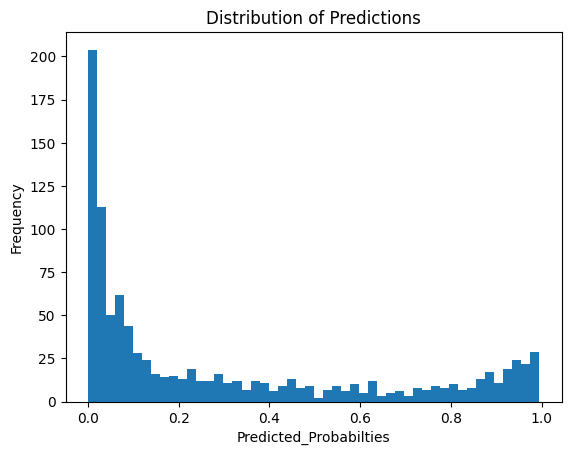

In [170]:
preds = ann.predict(TFdata_test)
plt.hist(preds, bins = 50)
plt.xlabel('Predicted_Probabilties')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions')
plt.show()

NOW OPTIMISING OUR APPROACH BY USING TRUNCATED TF-IDF VECTORIZATION

#TRUNCATED TF-IDF VECTORISATION for Text Data Preprocessing

In [171]:
# Apply Truncated SVD
svd = TruncatedSVD(n_components=500)  # Adjust components based on dataset size
tfidf_reduced = svd.fit_transform(tfidf_matrix)  # Now it's a dense matrix

# Convert to DataFrame and concatenate
tfidf_reduced_df = pd.DataFrame(tfidf_reduced, columns=[f"svd_{i}" for i in range(500)])
tfdatared = pd.concat([df, tfidf_reduced_df], axis=1)

In [172]:
tfdatared.drop('text', axis = 1, inplace = True)
tfdatared.drop('cleaned_text', axis = 1, inplace = True)

In [173]:
tfdatared_train, tfdatared_test, y_train, y_test = train_test_split(tfdatared, y, test_size=0.2, random_state=42)

#CLASSICAL MODEL ON TRUNCATED TFIDF

In [174]:
metrics_to_be_calculated = {}

for model_name, model in models_to_be_deployed.items(): #iterating through the models

    model.fit(tfdatared_train, y_train) # training


    y_predicted = model.predict(tfdatared_test) #prediction


    metrics_to_be_calculated[model_name] = {
     "accuracy_score": accuracy_score(y_test, y_predicted),
    "precision_score": precision_score(y_test, y_predicted, average = 'weighted'),
    "f1_score": f1_score(y_test, y_predicted, average = 'weighted'),
    "recall_score": recall_score(y_test, y_predicted, average = 'weighted')


    }



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Evaluating Classical Model

In [175]:
metrics_df = pd.DataFrame.from_dict(metrics_to_be_calculated, orient='index') ## Convert the dictionary of calculated metrics into a DataFrame for better visualization

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
print(metrics_df)


                              accuracy_score  precision_score  f1_score  recall_score
LOGISTIC REGRESSION                    0.810         0.796219  0.799111         0.810
LINEAR SVC                             0.798         0.786282  0.790285         0.798
DECISION TREE CLASSIFIER               0.692         0.707421  0.698981         0.692
RANDOM FOREST CLASSIFIER               0.755         0.695283  0.700867         0.755
GAUSSIAN NAIVE BAYES                   0.730         0.785340  0.746652         0.730
BERNOULLI NAIVE BAYES                  0.769         0.773568  0.771147         0.769
GRADIENT BOOSTING CLASSIFIER           0.781         0.762302  0.767702         0.781
EXTRA TREES CLASSIFIER                 0.774         0.734613  0.713569         0.774


#NEURAL NETWORK ON TRUNCATED TFIDF

In [176]:
#ANN MODELS

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape= (tfdatared_train.shape[1],))) # Change input_shape to match tfdatared_train
ann.add(tf.keras.layers.BatchNormalization())  # Normalize activations to stabilize training
ann.add(tf.keras.layers.Dropout(0.3))

ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.BatchNormalization())  # Normalize activations to stabilize training
ann.add(tf.keras.layers.Dropout(0.3))

ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss=tfa.losses.SigmoidFocalCrossEntropy(from_logits=False), metrics=['accuracy'])
tfdatared_train = tfdatared_train.apply(pd.to_numeric, errors='coerce').fillna(0)
tfdatared_test = tfdatared_test.apply(pd.to_numeric, errors='coerce').fillna(0)
ann.fit(tfdatared_train, y_train, batch_size=64, epochs=25, validation_data=(tfdatared_test, y_test))


Epoch 1/25
63/63 [==============================] - 2s 10ms/step - loss: 0.1846 - accuracy: 0.6227 - val_loss: 0.0645 - val_accuracy: 0.7670
Epoch 2/25
63/63 [==============================] - 0s 4ms/step - loss: 0.0813 - accuracy: 0.7042 - val_loss: 0.0536 - val_accuracy: 0.7670
Epoch 3/25
63/63 [==============================] - 0s 4ms/step - loss: 0.0649 - accuracy: 0.7320 - val_loss: 0.0511 - val_accuracy: 0.7670
Epoch 4/25
63/63 [==============================] - 0s 4ms/step - loss: 0.0615 - accuracy: 0.7337 - val_loss: 0.0480 - val_accuracy: 0.7670
Epoch 5/25
63/63 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.7420 - val_loss: 0.0466 - val_accuracy: 0.7670
Epoch 6/25
63/63 [==============================] - 0s 4ms/step - loss: 0.0544 - accuracy: 0.7458 - val_loss: 0.0460 - val_accuracy: 0.7670
Epoch 7/25
63/63 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.7492 - val_loss: 0.0448 - val_accuracy: 0.7670
Epoch 8/25
63/63 [=

In [177]:
import numpy as np
from sklearn.metrics import accuracy_score

def find_best_threshold_accuracy(y_true, y_pred_probs):
    """
    Finds the optimal threshold that maximizes accuracy.

    Parameters:
    y_true (array): True binary labels (0 or 1).
    y_pred_probs (array): Predicted probabilities.

    Returns:
    best_threshold (float): Threshold that gives the highest accuracy.
    """
    thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1
    accuracies = []

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred)
        accuracies.append(acc)

    best_threshold = thresholds[np.argmax(accuracies)]  # Get threshold with max accuracy

    return best_threshold

# Get probabilities for class 1
y_pred_probs = ann.predict(tfdatared_test).flatten()

# Find the best threshold based on Accuracy
optimal_threshold = find_best_threshold_accuracy(y_test, y_pred_probs)
print(f"OPTIMAL THRESHOLD (Accuracy-based): {optimal_threshold:.4f}")

# Apply threshold to get final predictions
y_prediction = (ann.predict(tfdatared_test) > optimal_threshold).astype(int)


32/32 [==============================] - 0s 1ms/step
OPTIMAL THRESHOLD (Accuracy-based): 0.5253
32/32 [==============================] - 0s 1ms/step


#Evaluating the ANN model

In [178]:
metrics_dict = {
    "accuracy_score": accuracy_score(y_test, y_prediction),
    "precision_score": precision_score(y_test, y_prediction, average = 'weighted'),
    "f1_score": f1_score(y_test, y_prediction, average = 'weighted'),
    "recall_score": recall_score(y_test, y_prediction, average = 'weighted')

}

# Print results
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")

accuracy_score: 0.8010
precision_score: 0.7897
f1_score: 0.7579
recall_score: 0.8010


32/32 [==============================] - 0s 2ms/step


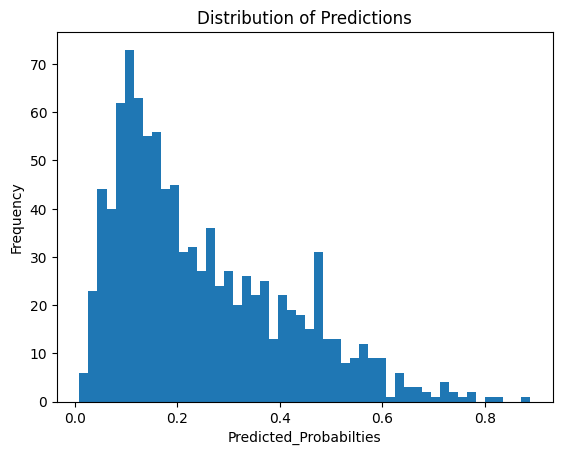

In [179]:
preds = ann.predict(tfdatared_test)
plt.hist(preds, bins = 50)
plt.xlabel('Predicted_Probabilties')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions')
plt.show()

In [181]:
#OUR NEXT APPROACH WILL INCLUDE GloVe & FastText feature_extraction METHODS

#GloVe and FastText applied on different .ipynb file